# Schneiders Hackathon

## Group 42

### Bendiks Herbold, Catarina Almeida, José Luz

**Objective:** Classify satalite images in deforestation types


## **Import libraries and data**


In [1]:
#pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import np_utils
import cv2


2022-11-19 22:39:56.402251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def import_Pics (path):
    img = cv2.imread(path)
    return img

In [4]:
# Load the input dataset

dataset = pd.read_csv ('train.csv')
dataset['example_path'] = dataset['example_path'].apply(import_Pics)

dataset_rar = pd.read_csv ('train.csv')
dataset_rar['example_path'] = dataset_rar['example_path'].apply(import_Pics)

# Normalize data

dataset['example_path'] = dataset['example_path'].apply(lambda i: i / 255.0)

In [5]:
dataset.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,"[[[0.2196078431372549, 0.23137254901960785, 0...."
1,2,-1.989349,105.309496,2013,"[[[0.0392156862745098, 0.10588235294117647, 0...."
2,0,1.223256,100.702217,2014,"[[[0.07450980392156863, 0.12941176470588237, 0..."
3,0,-2.342948,103.890226,2008,"[[[0.050980392156862744, 0.09411764705882353, ..."
4,0,-0.126555,101.758175,2011,"[[[0.054901960784313725, 0.12156862745098039, ..."


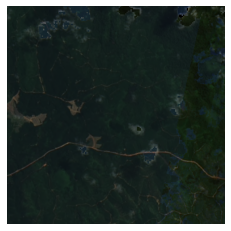

In [6]:
plt.axis("off")
plt.imshow(cv2.cvtColor(dataset_rar['example_path'][0], cv2.COLOR_BGR2RGB))
plt.show()

## **2. Understanding the data**

Visualize and understand the data to know its characteristics. 

1. How much data is there? How many attributes are there in the data?  
2. What do they mean?
3. Is there any missing data? 
4. Are the labels balanced? 
5. Statistical summary of the input data set.

1. **How much data is there? How many attributes are there in the data?**

In [7]:
# Data rows/columns

dataset.shape

(1714, 5)

In [8]:
#check data head
dataset.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,"[[[0.2196078431372549, 0.23137254901960785, 0...."
1,2,-1.989349,105.309496,2013,"[[[0.0392156862745098, 0.10588235294117647, 0...."
2,0,1.223256,100.702217,2014,"[[[0.07450980392156863, 0.12941176470588237, 0..."
3,0,-2.342948,103.890226,2008,"[[[0.050980392156862744, 0.09411764705882353, ..."
4,0,-0.126555,101.758175,2011,"[[[0.054901960784313725, 0.12156862745098039, ..."


**2. What do they mean?** 



In [9]:
# Data format
dataset.dtypes


label             int64
latitude        float64
longitude       float64
year              int64
example_path     object
dtype: object

**3. Is any data missing? If so, please indicate how many and in which attribute**. 



In [10]:
dataset.isna().sum()

label           0
latitude        0
longitude       0
year            0
example_path    0
dtype: int64

**4. Are the targets balanced?** 

0    860
2    658
1    196
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

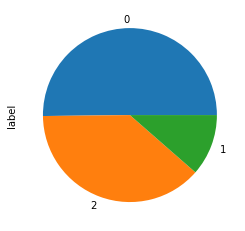

In [11]:
# Check if the labels are unbalanced
balance_clases = dataset['label'].value_counts()

print(balance_clases)

# Class balance graph
balance_clases.plot.pie()

# Very unbalanced Data for class number 1

In [12]:
#Get all data point from minority data from class 1

is_one_labels = dataset['label'] == 1
one_labels = dataset[is_one_labels]


In [13]:
one_labels.shape

(196, 5)

In [14]:
# Duplicate these datapoints to get more balanced data 

dataset = dataset.append(one_labels)

dataset.shape

/var/folders/hb/hsxv_19969b646bj1n59j_3w0000gn/T/ipykernel_2409/3128237355.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(one_labels)


(1910, 5)

0    860
2    658
1    392
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

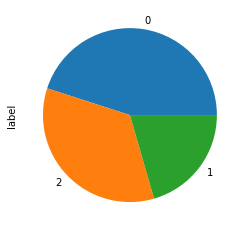

In [15]:
# Check if the labels are unbalanced

balance_clases = dataset['label'].value_counts()

print(balance_clases)

# Class balance graph
balance_clases.plot.pie()

**5. Summary statistics of the input data set:** 

Descriptive statistic values


In [16]:
# Statistical data for each attribute

dataset.describe()

,label,latitude,longitude,year
count,1910.000000,1910.000000,1910.000000,1910.000000
mean,0.894241,-0.536977,109.069514,2010.262304
std,0.885432,2.156800,9.303941,4.264168
min,0.000000,-8.318462,95.902427,2001.000000
25%,0.000000,-2.021375,101.687689,2007.000000
50%,1.000000,-0.687980,106.273136,2011.000000
75%,2.000000,1.025061,114.693711,2014.000000
max,2.000000,5.014370,140.900849,2016.000000


## **3. Visualize the data**.

A visual way to understand the input data. 
1. Histogram
2. Density curve
3. Boxplots
4. Correlation matrix

not so relevant here as we deal with pictures

**1. Histogram**

Graphical representation of each of the attributes in the form of bars, where the surface of the bar is proportional to the frequency of the values represented.

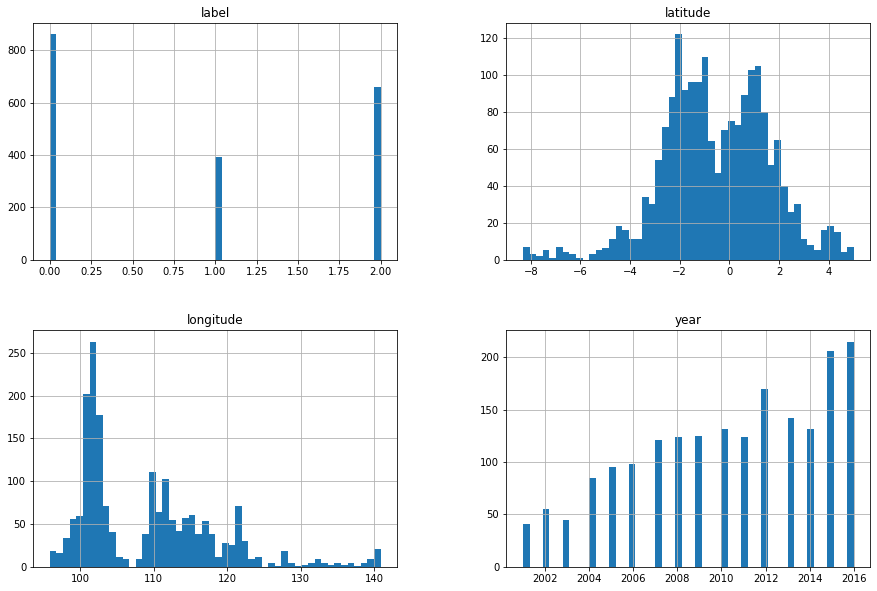

In [17]:
histogram = dataset.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15, 10))

**2. Density graph**.

Visualizes the distribution of the data. It is a variable of the histogram, but removes noise, so they are better for determining the distribution shape of an attribute. Density plot spikes help show where values are most concentrated. 

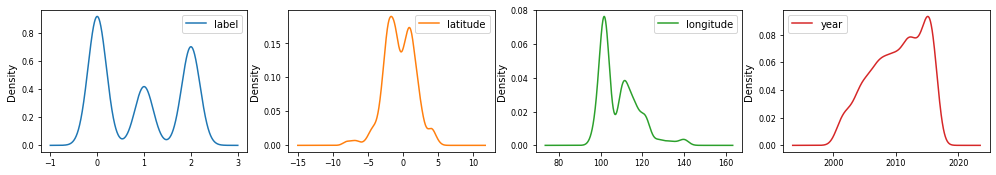

In [18]:
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

* Which attribute is striking because of its outliers? 

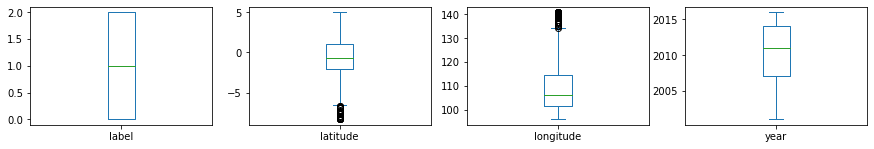

In [19]:
atributs_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

**4. Correlation matrix**. 
We use Spearman's method to evaluate the monotonic relationship between two continuous variables. 

Comparison between [Pearson y Spearman]

* **Which variable has no correlation with any attribute?** 

In [20]:
#  Other data visualization library: seaborn
import seaborn as sns

# Calculation of correlation coefficients

corr_matrix= dataset.corr(method='spearman')



/var/folders/hb/hsxv_19969b646bj1n59j_3w0000gn/T/ipykernel_2409/2026869443.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


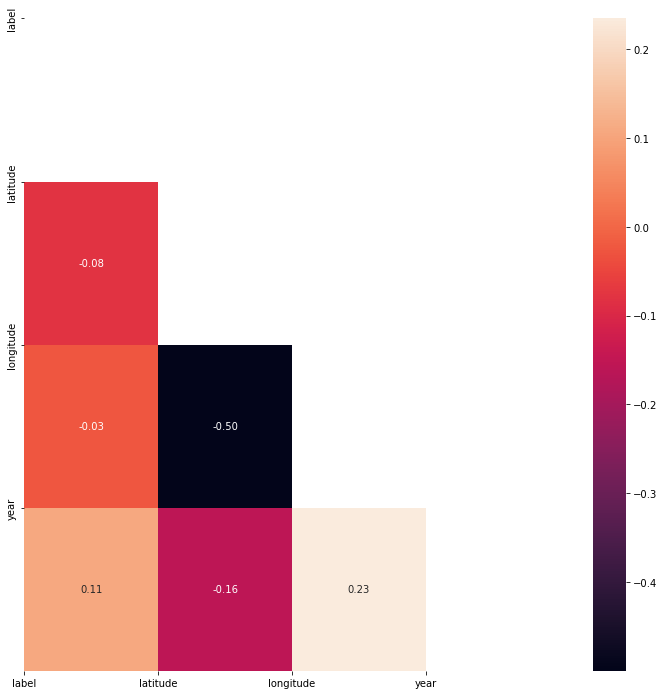

In [21]:
# Remove repeated values
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))

#Generate Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()


We cannot see the correlation with the RBG Values, we must pass it to numeric *LabelEncoder*.

In [22]:
# HotEncoder

# should be added in further investigation

## *4. Prepare the data*.

1. Missing data
2. Data cleaning (remove outliers).
3. LabelEncoding (we have already done it).
4. Feature engineering
5. Transformation.

First, I divide the data into **attributes**: X (features) and **tags**: y (target).

In [23]:
# Atributes X (features); labels y (target)

X = dataset.drop(['label'], axis=1)

y = dataset['label']



**Missing data**

Check whether Nan exists in the input data.



In [24]:
# Check for missing data in attributes

X.isna().sum()

latitude        0
longitude       0
year            0
example_path    0
dtype: int64

In [25]:
# Check for missing data in the target

y.isna().sum()

0

In [26]:
# Check that no value is missing
X.isna().sum()



latitude        0
longitude       0
year            0
example_path    0
dtype: int64

In [27]:
## No changes needed

**3. Feature engineering**

### drop small correlating features

all non RBG values were low collelating

**Which attribute(s) are eliminated?**

In [28]:
# Delete the attribute

X.drop(['latitude', 'longitude','year'], axis=1, inplace=True)


## *5. Split data*

In [29]:
# Get the RBG data in the right dimension and numpy formate for the CNN model

X_list = []

for i, pic in enumerate(X['example_path']):
    X_list.append(pic)

X = np.array(X_list)

In [30]:
X.shape

(1910, 332, 332, 3)

In [31]:
# Split the data 80/20

from sklearn.model_selection import train_test_split

test_size = 0.2  # percentage of the input data that you will use to validate the model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)


**4. Transformation (scaling, if neccesary)**. 


In [32]:
# already done in Normalization

## *6.  Model building and evaluation*

Using a CNN model

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(332, 332, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])


2022-11-19 22:41:09.466808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
39/39 [==============================] - 132s 3s/step - loss: 1.9274 - accuracy: 0.4304
Epoch 2/5
39/39 [==============================] - 124s 3s/step - loss: 0.9676 - accuracy: 0.4959
Epoch 3/5
39/39 [==============================] - 115s 3s/step - loss: 0.7775 - accuracy: 0.6285
Epoch 4/5
39/39 [==============================] - 118s 3s/step - loss: 0.4970 - accuracy: 0.8101
Epoch 5/5
39/39 [==============================] - 112s 3s/step - loss: 0.2529 - accuracy: 0.9247


## *7. Evaluate Model*.

F1-score

In [36]:
y_pred = cnn.predict(X_test)

12/12 [==============================] - 8s 609ms/step


In [37]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [38]:
from sklearn.metrics import classification_report


print("Classification Report: \n", classification_report(y_test, y_pred_classes))






Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       162
           1       0.72      0.71      0.72        89
           2       0.56      0.53      0.54       131

    accuracy                           0.64       382
   macro avg       0.65      0.64      0.65       382
weighted avg       0.64      0.64      0.64       382



In [39]:
# Load the input dataset

dataset_unlabeled = pd.read_csv ('test.csv')
dataset_unlabeled['example_path'] = dataset_unlabeled['example_path'].apply(import_Pics)

# Normalize data

dataset_unlabeled['example_path'] = dataset_unlabeled['example_path'].apply(lambda i: i / 255)

X_unlabeled = dataset_unlabeled

X_list_unlabeled = []

for i, pic in enumerate(X_unlabeled['example_path']):
    X_list_unlabeled.append(pic)
    
X_unlabeled = np.array(X_list_unlabeled)


In [40]:
X_unlabeled.shape

(635, 332, 332, 3)

In [41]:
y_pred_unlabeled = cnn.predict(X_unlabeled)

20/20 [==============================] - 12s 583ms/step


In [42]:
y_classes_unlabeled = [np.argmax(element) for element in y_pred_unlabeled]

In [43]:
#Pass the predictions in a JSON File

import json
from json import JSONEncoder

dataset_names = pd.read_csv ('test.csv')

image_indexes = []
target_dict = {"target":{}}

i= 0
for  image in dataset_names['example_path']:
    image_indexes.append(int(image.split('/')[-1].split('.')[0]))
    i = i+1

my_dict = {}

for i, image in enumerate(image_indexes):
    my_dict[str(image)] = int(y_classes_unlabeled[i])

target_dict = {"target":my_dict}

json_object = json.dumps(target_dict,indent=1)

with open('target_DT42_FINAL.json', "w") as file:
    json.dump(target_dict,file)
